# PMS STAY INFORMATION 

### Content of dataset

This project is designed to analyze the hospitality sector customer data set. In this project data scientist methods are used for data analysis, and for their visualization.

The dataset contains personal information about a thousands of guests who booked and stayed at the hotel at different times. The list of dataset parameter values with their short explanation is given below:

- **I_lastname** - Customer Name
- **I_firs** - Customer Name
- **s_adate** - Arrival Date
- **S_DDATE**  - Departure Date
- **I_RECID**, **S_STAYID**  - ID 
- **S_GSTTYPE** - Guest type
- **s_rooms** - No of rooms
- **S_BLDG** - Building type
- **S_RMTYPE** -  Room type
- **S_ADULTS** - No of adults
- **S_YOUTH** - No of youth
- **S_CHILDREN** - No of children
- **S_RATE** - Price
- **S_PRMTYPE** - PRMTYPE
- **S_TARIFF** - Tariff
- **S_METHOD** - Payment method

This analysis will address the following key questions:

1. Customer segmentation
2. Demand forecast
3. Pricing analysis

### Data Collection

First import the libraries to be able to call functions that needed for this prject

In [18]:
import pandas as pd
import numpy as np

import sklearn.model_selection 
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import division
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

### Import all datasets and short characteristics

Detailed descriptions of the datasets have been shown in this section

In [2]:
df = pd.read_csv("PMS STAY INFORMATION.csv", delimiter=';', skiprows=0, low_memory=False)
df.head()

,I_lastname,I_first,s_adate,S_DDATE,I_RECID,S_STAYID,S_GSTTYPE,s_rooms,S_BLDG,S_RMTYPE,S_ADULTS,S_YOUTH,S_CHILDREN,S_RATE,S_PRMTYPE,S_TARIFF,S_METHOD
0,Gential,Dena,8/2/18,8/6/18,OB6YS9NYJ3,OBGGRQGH98,LTRAN,1,WILSON,KV2,2,0,0,109,NaN,BAR,MAST
1,Miller,Edward,4/16/21,4/17/21,OBBF442VZ9,OB5R9KRD7Y,LTRAN,1,WILSON,LP1,2,0,0,129,NaN,BAR,MAST
2,"""Coach""",Bruce,5/3/19,5/5/19,OB82YXAOQO,OBQ41X3ZQD,GROUP,1,COTTAG,C161,1,0,0,"56,25",C167,GROUP,VISA
3,(Bishop Walsh) Austin,Evan,1/2/20,1/5/20,OBH8D7NWMC,OB2CULS44P,GROUP,1,WILSON,BD2,2,0,0,99,NaN,GROUP,CASH
4,(Bishop Walsh) Roberts,Travis,1/2/20,1/5/20,OBL3OKCWCV,OB5FBHVW5G,GROUP,1,WILSON,BD2,2,0,0,99,NaN,GROUP,CASH


In [3]:
print ("The volume of table is: ", df.shape)
print ("The list of columns is: ", df.columns)

The volume of table is:  (178470, 17)
The list of columns is:  Index(['I_lastname', 'I_first', 's_adate', 'S_DDATE', 'I_RECID', 'S_STAYID',
       'S_GSTTYPE', 's_rooms', 'S_BLDG', 'S_RMTYPE', 'S_ADULTS', 'S_YOUTH',
       'S_CHILDREN', 'S_RATE', 'S_PRMTYPE', 'S_TARIFF', 'S_METHOD'],
      dtype='object')


The dataset contains the customers’ personal details, each of them characterized by 17 labeled variables. In total 178470 customers are provided in the dataset.

### Data preparation

In the unloaded table (the first five rows), obvious problems are immediately visible, the solution of which must be done immediately for a more complete further analysis. Among the obvious problems identified are the following:

1. The format of the "S_RATE" column, which denotes the price, has a format that is incompatible with the analysis and construction of models, namely, instead of dots, there are commas and, accordingly, instead of a digital format - categorical. Replacing commas with dots and converting to digital format is required

2. For a full analysis of time trends, you will need to add additional columns, such as month, year, day of the week, length of stay, etc.

3. To avoid further distortion of the analysis, it will be necessary to delete empty values in the dataset

#### 1. Transformation of the price column

In [4]:
df["S_RATE"] = df["S_RATE"].str.replace(',','.')
df['S_RATE'] = df['S_RATE'].astype(float)

#### 2. Transformation of the date column

In [5]:
# Arrival date
df['Arrival_month'] = pd.DatetimeIndex(df['s_adate']).month
df['Arrival_weekday'] = pd.DatetimeIndex(df['s_adate']).weekday

# Year of arrival
df['Year'] = pd.DatetimeIndex(df['s_adate']).year

#Length of stay
df[['s_adate','S_DDATE']] = df[['s_adate','S_DDATE']].apply(pd.to_datetime) #if conversion required
df['Length_of_stay'] = (df['S_DDATE'] - df['s_adate']).dt.days
df['Length_of_stay']=df['Length_of_stay'].abs()


#### 3. Converting negative numbers to positive

Apparently, there are errors in the dataset, and some variables have a negative value, such as length of stay and number of youth

In [6]:
# Length of stay
df['Length_of_stay']=df['Length_of_stay'].abs()

# Number of youth
df['S_YOUTH']=df['S_YOUTH'].abs()

#### 4. Removing empty values

In [7]:
df = df.dropna()

The simplest manipulations with data preparation are completed

## Data exploration

At this stage, we will make a deeper study of the data, namely their structure, statistical indicators, patterns and existing relationships.

#### 1. Data structure

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78066 entries, 2 to 178465
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   I_lastname       78066 non-null  object        
 1   I_first          78066 non-null  object        
 2   s_adate          78066 non-null  datetime64[ns]
 3   S_DDATE          78066 non-null  datetime64[ns]
 4   I_RECID          78066 non-null  object        
 5   S_STAYID         78066 non-null  object        
 6   S_GSTTYPE        78066 non-null  object        
 7   s_rooms          78066 non-null  int64         
 8   S_BLDG           78066 non-null  object        
 9   S_RMTYPE         78066 non-null  object        
 10  S_ADULTS         78066 non-null  int64         
 11  S_YOUTH          78066 non-null  int64         
 12  S_CHILDREN       78066 non-null  int64         
 13  S_RATE           78066 non-null  float64       
 14  S_PRMTYPE        78066 non-null  obje

During the analysis of the data structure, it can be seen that after cleaning the data, the total volume has significantly decreased, and now there are no zero values.

#### 2. Statistical indicators

In [9]:
df.describe()

,s_rooms,S_ADULTS,S_YOUTH,S_CHILDREN,S_RATE,Arrival_month,Arrival_weekday,Year,Length_of_stay
count,78066.0,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000
mean,1.0,1.787500,0.012336,0.102311,124.932008,7.506584,3.537584,2019.407258,2.250749
std,0.0,1.476596,0.153322,0.454104,78.826687,3.353724,1.807222,1.088401,3.368791
min,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2018.000000,0.000000
25%,1.0,1.000000,0.000000,0.000000,73.000000,5.000000,2.000000,2018.000000,1.000000
50%,1.0,2.000000,0.000000,0.000000,109.000000,8.000000,4.000000,2019.000000,2.000000
75%,1.0,2.000000,0.000000,0.000000,157.100000,11.000000,5.000000,2020.000000,2.000000
max,1.0,30.000000,10.000000,10.000000,1872.000000,12.000000,6.000000,2021.000000,460.000000


when displaying information on statistical indicators, statistics on price may seem the most interesting, namely:

- The maximum price per client was generated at 1872 and judging by the fact that 75% of prices are kept at 157, this means that such a maximum price is quite rare

- Minimum price - 0 (perhaps this is a flaw in the dataset, since the presence of a zero price is illogical)

- Average price is 124.93

- The standard deviation from the mean is 78, which is quite a large value and suggests that in fact the mean is much less than 124.93

#### 3. Checking for unique values

In [10]:
df.nunique()

I_lastname         25692
I_first             6731
s_adate             1429
S_DDATE             1431
I_RECID            58428
S_STAYID           78066
S_GSTTYPE              3
s_rooms                1
S_BLDG                 2
S_RMTYPE              75
S_ADULTS              25
S_YOUTH                6
S_CHILDREN            11
S_RATE              1399
S_PRMTYPE             63
S_TARIFF              21
S_METHOD               9
Arrival_month         12
Arrival_weekday        7
Year                   4
Length_of_stay        64
dtype: int64

During the verification of unique values ​​in the dataset, the following was revealed:

- there are currently 25692 unique clients in the dataset (judging by the lastname field)

This may indicate that some of the clients are repeated and they are regular guests of the hotel (this will be verified during clustering and analysis of profitable clients later in the project)

#### 4. Arrival trends by months

In order to search for patterns in the behavior of customers, we will build the first diagram, which will show the dependence of the number of settlements in the context of months

Text(0, 0.5, 'No. of Arrival')

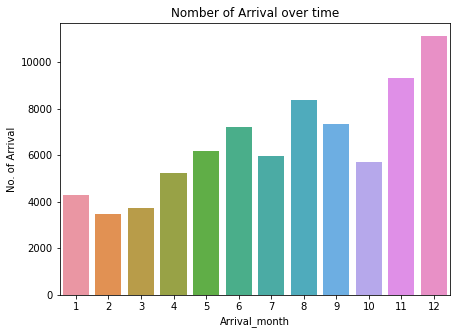

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Arrival_month'])
plt.title('Nomber of Arrival over time')
plt.xlabel('Arrival_month')
plt.ylabel('No. of Arrival')

Bar chart above shows that there are some patterns in the behavior of customers during the year, namely:

- at the beginning of the year (January, February, March) settlement is less active than in any other months of the year
- starting from April, there is a sharp increase in settlements every month
- in July, the number of settlements reaches the level of May, which is illogical, during the holidays, the summer months usually increase
- August shows a sharp increase
- autumn September and October show a decrease in customer activity
- the peak of customer activity falls on the winter months at the end of the year (November and December)

It is important that the averaged data for all years is taken as a basis, not for one particular year.

#### 5. Arrival trends by years

A similar distribution of activity in the number of hotel visits can be considered by years

Text(0, 0.5, 'No. of Arrival')

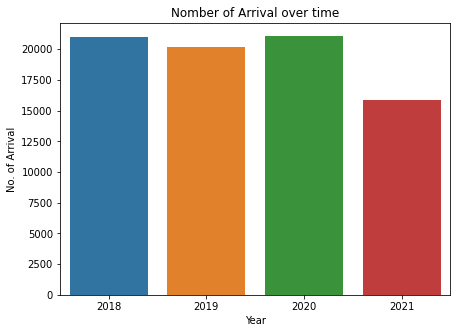

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Year'])
plt.title('Nomber of Arrival over time')
plt.xlabel('Year')
plt.ylabel('No. of Arrival')

The bar chart above shows that the most significant decline in customer activity began in 2021

#### 6. Arrival trends by weekdays

A similar distribution of activity by number of hotel visits can be viewed by day of the week to see when guests most frequently check in.

Text(0, 0.5, 'No. of Arrival')

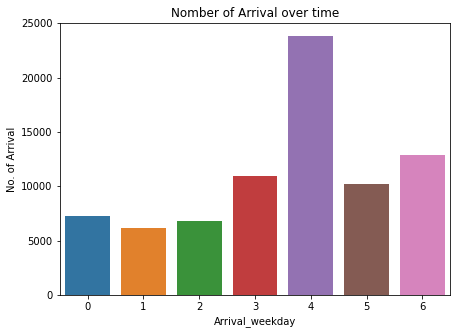

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Arrival_weekday'])
plt.title('Nomber of Arrival over time')
plt.xlabel('Arrival_weekday')
plt.ylabel('No. of Arrival')

Against the general background, the number of arrivals on Friday stands out strongly, which more than doubles compared to other days of the week

Important, the following notation:
- 0 - Monday
- 1- Tuesday
- 2 - Wednesday
- 3 - Thursday
- 4 - Friday
- 5 - Saturday
 -6 - Sunday

#### 7. Total prices trend over month 

The next step is to take a closer look at price analysis. First of all, a bar chart is shown with an total price by months

Text(0, 0.5, 'Total Price')

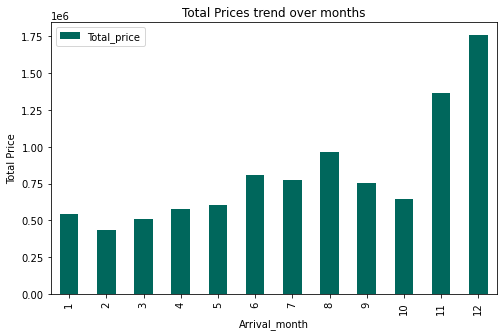

In [14]:
month_df=df.groupby(['Arrival_month']).S_RATE.sum()
month_df=month_df.reset_index()
month_df=month_df.rename(columns={'S_RATE':'Total_price'})

objects = month_df['Arrival_month']
y_pos = month_df['Total_price']

month_df.plot(kind='bar', 
           x='Arrival_month',
           y='Total_price',
           color = '#00675c', 
           figsize =(8,5), 
           title = 'Total Prices trend over months') 
plt.ylabel('Total Price')

In general, it is obvious that the total earned price by months repeats the trend of customer activity (the least activity and profit at the beginning of the year and the peak of activity and profit at the end of the year)

#### 8. Most profitable tariff

Given that the dataset contains information on tariffs, you can see which of the available tariffs is the most profitable and where the most profit is earned

Text(0, 0.5, 'Total Price')

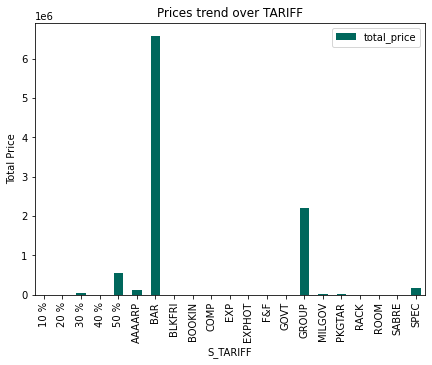

In [15]:
TARIFF_df=df.groupby(['S_TARIFF']).S_RATE.sum()
TARIFF_df=TARIFF_df.reset_index()
TARIFF_df=TARIFF_df.rename(columns={'S_RATE':'total_price'})

objects = TARIFF_df['S_TARIFF']
y_pos = TARIFF_df['total_price']

TARIFF_df.plot(kind='bar', 
           x='S_TARIFF',
           y='total_price',
           color = '#00675c', 
           figsize =(7,5), 
           title = 'Prices trend over TARIFF') 
plt.ylabel('Total Price')

It is clearly seen in the bar chat above that the most significant revenues were received from only three tariffs: "50%", "BAR", "GROUP". For all other tariffs, the profit is relatively lower or absent

#### 9. Most profitable Guest type

A similar analysis can be carried out by types of guests.

Text(0, 0.5, 'Total Price')

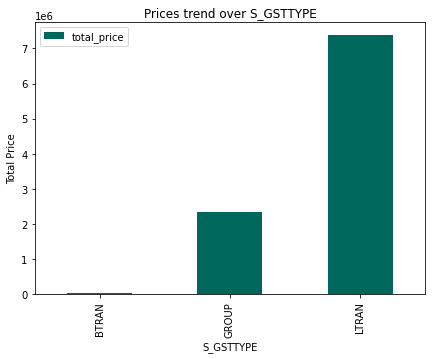

In [16]:
S_GSTTYPE_df=df.groupby(['S_GSTTYPE']).S_RATE.sum()
S_GSTTYPE_df=S_GSTTYPE_df.reset_index()
S_GSTTYPE_df=S_GSTTYPE_df.rename(columns={'S_RATE':'total_price'})

objects = S_GSTTYPE_df['S_GSTTYPE']
y_pos = S_GSTTYPE_df['total_price']

S_GSTTYPE_df.plot(kind='bar', 
           x='S_GSTTYPE',
           y='total_price',
           color = '#00675c', 
           figsize =(7,5), 
           title = 'Prices trend over S_GSTTYPE') 
plt.ylabel('Total Price')

The bar chart above shows that the obvious advantage in earned profit for the "LTRAN" type of guests is several times less for the "GROUP" type and is practically absent for the "BTRAN" type of guests.

#### 10. Most profitable Building type

The same analysis is applicable for the type of building

Text(0, 0.5, 'Total Price')

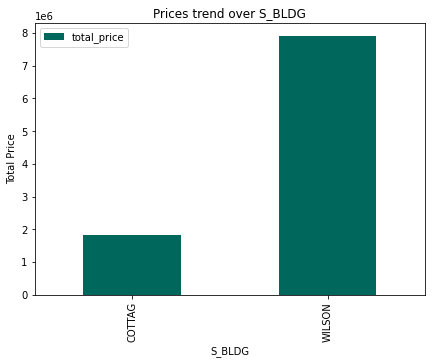

In [17]:
S_BLDG_df=df.groupby(['S_BLDG']).S_RATE.sum()
S_BLDG_df=S_BLDG_df.reset_index()
S_BLDG_df=S_BLDG_df.rename(columns={'S_RATE':'total_price'})

objects = S_BLDG_df['S_BLDG']
y_pos = S_BLDG_df['total_price']

S_BLDG_df.plot(kind='bar', 
           x='S_BLDG',
           y='total_price',
           color = '#00675c', 
           figsize =(7,5), 
           title = 'Prices trend over S_BLDG') 
plt.ylabel('Total Price')

Buildings like "WLSON" brought the hotel four times more profit than buildings like "COTTAG"

## Customer segmentation and clustering

First, let's describe the value and essence of Customer Segmentation and Clustering.

We can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.

Customers who use hotel have different needs and they have their own different profile. Your should adapt your actions depending on that.

We can do many different segmentations according to what we are trying to achieve. If we want to increase retention rate, we can do a segmentation based on churn probability and take actions. But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM.

RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:

**Low Value**: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.

**Mid Value**: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.

**High Value**: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

Firstly, we need to calculate *Recency, Frequency and Monetary Value*  (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) for each. Let’s jump into coding and see how to do RFM Clustering.

#### Recency

To calculate recency, we need to find out most recent purchase date of each customer and see how many days they are inactive for. After having no. of inactive days for each customer, we will apply K-means* clustering to assign customers a recency score.

In [22]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
tx_user = pd.DataFrame(df['I_lastname'].unique())
tx_user.columns = ['I_lastname']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = df.groupby('I_lastname').s_adate.max().reset_index()
tx_max_purchase.columns = ['I_lastname','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['I_lastname','Recency']], on='I_lastname')

tx_user.sample(5)


,I_lastname,Recency
17285,Murrin,399
19173,Rossett,1273
8251,Gormley,264
17009,Oddo,285
25255,Zingaro,1027


Our new dataframe tx_user above contains recency data now (for example, five samples from the table are shown)

To get a snapshot about how recency looks like, we can use pandas’ .describe() method. It shows mean, min, max, count and percentiles of our data.

In [23]:
tx_user.describe()

,Recency
count,25692.000000
mean,571.049237
std,405.526033
min,0.000000
25%,200.000000
50%,485.500000
75%,909.000000
max,1431.000000


The table above shows the following statistics:

- the maximum number of inactive days is 1431
- the average value of inactive days is 571 days, while the standard deviation from the average is 405 days, which means a fairly large spread around the average value
- the minimum of inactive days is equal to zero, which means that the settlement is made to this day

Next we are going to apply K-means clustering to assign a recency score. But we should tell how many clusters we need to K-means algorithm. To find it out, we will apply Elbow Method. Elbow Method simply tells the optimal cluster number for optimal inertia. Code snippet and Inertia graph are as follows:

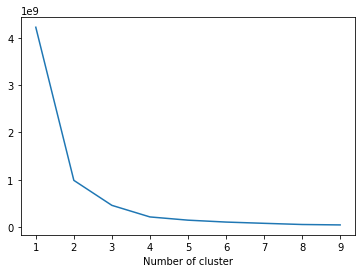

In [25]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Here it looks like 3 is the optimal one. Based on business requirements, we can go ahead with less or more clusters. We will be selecting 4 for this example

In [26]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

We have calculated clusters and assigned them to each Customer in our dataframe tx_user.

In [27]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,5276.0,1187.811979,112.398102,991.0,1093.0,1175.0,1279.0,1431.0
1,5693.0,791.854910,101.115231,609.0,711.0,767.0,876.0,989.0
2,6980.0,425.944842,81.927499,273.0,355.0,421.0,489.0,608.0
3,7743.0,119.253003,72.983992,0.0,62.0,112.0,181.0,272.0


The table with statistical characteristics of clusters by recentness says the following:

- customers are divided into 4 clusters, they are shown in the table in descending order, 0 - those who have been inactive for the most time and 3 - vice versa, who are active (you can call them regular customers). Thus, the higher the serial number, the "better" clients
- in each cluster, you can separately view the average, minimum, maximum and other statistical values

#### Frequency

To create frequency clusters, we need to find total number orders for each customer. First calculate this and see how frequency look like in our customer database:

In [30]:
#get order counts for each user and create a dataframe with it
tx_frequency = df.groupby('I_lastname').s_adate.count().reset_index()
tx_frequency.columns = ['I_lastname','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='I_lastname')


Apply the same logic for having frequency clusters and assign this to each customer:

In [31]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,25309.0,2.312458,2.667786,1.0,1.0,1.0,2.0,21.0
1,358.0,39.977654,18.914952,22.0,26.0,32.0,49.0,104.0
2,23.0,175.130435,61.518145,109.0,138.0,148.0,186.5,326.0
3,2.0,600.000000,5.656854,596.0,598.0,600.0,602.0,604.0


Characteristics of our frequency clusters look like above. As the same notation as recency clusters, high frequency number indicates better customers. It is interesting to note that there are clients who used the services of the hotel once, and there are those who used more than 600 times 

#### Revenue

Let’s see how our customer database looks like when we cluster them based on revenue. We will calculate revenue for each customer, plot a histogram and apply the same clustering method

In [32]:
#calculate revenue for each customer
tx_revenue = df.groupby('I_lastname').S_RATE.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='I_lastname')

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_user.query('S_RATE < 10000')['S_RATE']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In general, the trend is quite logical, clients that bring the most income are fewer in number than others. Let’s continue and apply k-means clustering:

In [33]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['S_RATE']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['S_RATE']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'S_RATE',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['S_RATE'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,25280.0,284.325553,349.763352,0.00,99.0000,159.000,309.0000,2558.61
1,383.0,4838.745209,2245.820469,2575.24,3160.9200,3973.080,6060.7450,12654.68
2,27.0,20731.857037,6934.601996,13658.02,15559.0400,18240.690,23961.7700,36822.57
3,2.0,76096.315000,2499.983096,74328.56,75212.4375,76096.315,76980.1925,77864.07


By profitability, customers are divided into the following clusters:
- 0 - from 0 to 309
- 1 - from 2575 to 6060
- 2 - from 13658 to 23961
- 3 from 74328 to 76980

It is noteworthy that the more profitable customers are, the fewer they are in number (as noted earlier)

#### Overall Score

We have scores (cluster numbers) for recency, frequency & revenue. Let’s create an overall score out of them:

In [36]:
#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','S_RATE'].mean()


,Recency,Frequency,S_RATE
OverallScore,,,
0,1187.935067,1.327701,163.502517
1,791.987689,1.707000,215.299421
2,426.809783,2.151054,283.394673
3,124.121872,3.604869,427.878738
4,93.758621,20.655172,2869.312644
5,49.750000,41.503333,5282.300650
6,14.250000,98.250000,14947.180000
7,14.043478,175.130435,21737.887826
9,2.000000,600.000000,76096.315000


The scoring above clearly shows us that customers with score 8 is our best customers whereas 0 is the worst.

To keep things simple, better we name these scores:

- 0 to 2: Low Value
- 3 to 4: Mid Value
- 5+: High Value

We can easily apply this naming on our dataframe:

In [35]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

Let’s see how our segments distributed on a scatter plot:

In [37]:
#Revenue vs Frequency
tx_graph = tx_user.query("S_RATE < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['S_RATE'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['S_RATE'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['S_RATE'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]


In [38]:
plot_layout = go.Layout(
        yaxis= {'title': "S_RATE"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [41]:
#Revenue Recency

tx_graph = tx_user.query("S_RATE < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['S_RATE'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['S_RATE'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['S_RATE'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]



In [42]:
plot_layout = go.Layout(
        yaxis= {'title': "S_RATE"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [43]:
# Revenue vs Frequency
tx_graph = tx_user.query("S_RATE < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

In [44]:
plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

We can start taking actions with this segmentation. The main strategies are quite clear:

- High Value: Improve Retention
- Mid Value: Improve Retention + Increase Frequency
- Low Value: Increase Frequency